# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


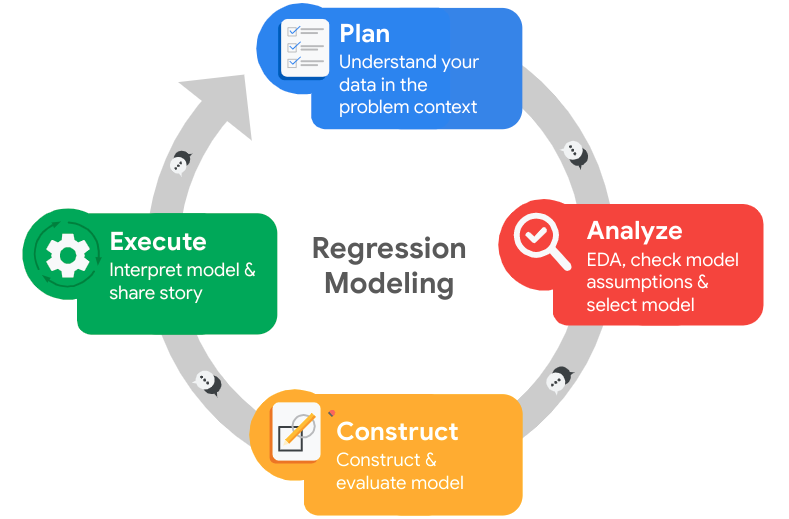

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- Who are your stakeholders for this project?

Stakeholders include the HR department at Salifort Motors, who initiated the project, and potentially, senior management concerned with employee satisfaction and retention.

*  What are you trying to solve or accomplish?

The primary goal is to predict whether an employee is likely to leave the company. This prediction can help identify factors contributing to employee turnover, aiding in the development of initiatives to improve retention.

*  What are your initial observations when you explore the data?

Initial observations will include assessing the distribution of variables, identifying any patterns or trends, and understanding the range and nature of data points.

*  What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

Resources may include the Kaggle dataset source for detailed information on variables: Kaggle Dataset.

*  Do you have any ethical considerations in this stage?

Ethical considerations may involve ensuring the confidentiality and privacy of employee data, especially when dealing with sensitive information such as satisfaction levels and reasons for leaving.

## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [4]:
# Import packages
import pandas as pd

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
# Gather basic information about the data
### YOUR CODE HERE ###
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
### YOUR CODE HERE ###

df0.columns = df0.columns.str.lower().str.replace(' ', '_')

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df0_cleaned = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

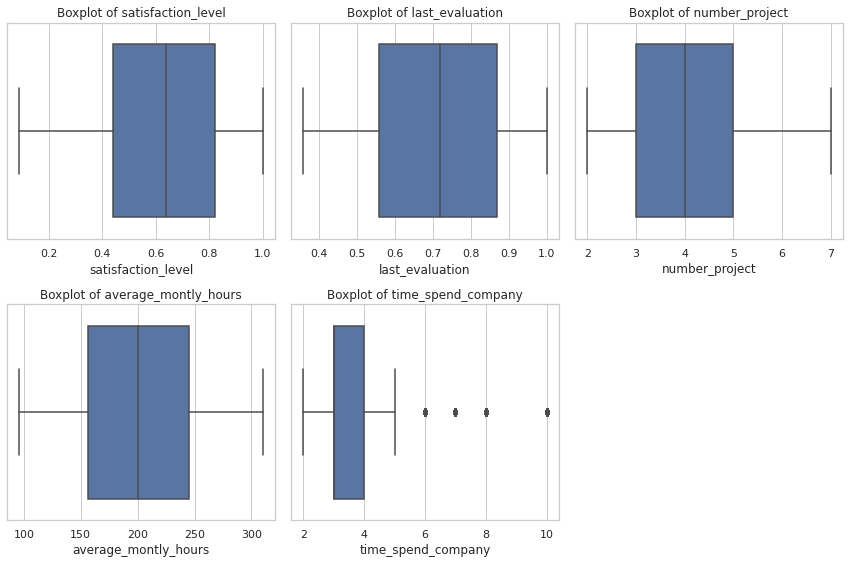

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical columns
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# Create boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df0[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Calculate IQR for each numerical column
Q1 = df0[numerical_columns].quantile(0.25)
Q3 = df0[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine the number of rows containing outliers
outliers_count = ((df0[numerical_columns] < (Q1 - 1.5 * IQR)) | (df0[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1).sum()

outliers_count

1282

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

left_counts = df0['left'].value_counts()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###

left_percentage = (left_counts / len(df0)) * 100
left_counts, left_percentage


(0    11428
 1     3571
 Name: left, dtype: int64,
 0    76.191746
 1    23.808254
 Name: left, dtype: float64)

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

Text(0, 0.5, 'Density')

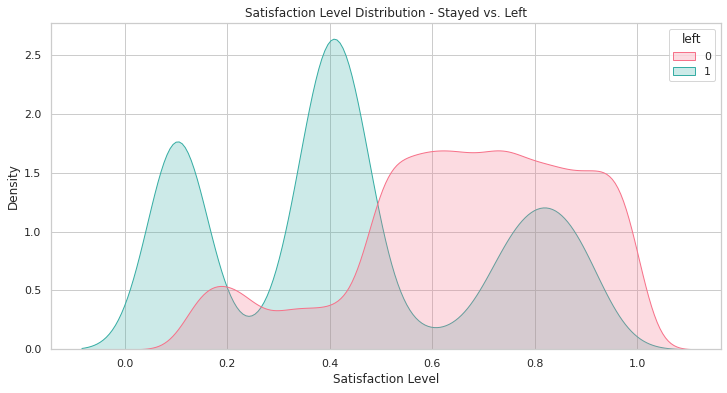

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###

# Visualize Satisfaction Level vs. Leaving
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df0_cleaned, x='satisfaction_level', hue='left', common_norm=False, fill=True, palette="husl")
plt.title('Satisfaction Level Distribution - Stayed vs. Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

# Visualize Number of Projects vs. Leaving
plt.figure(figsize=(12, 6))
sns.countplot(data=df0_cleaned, x='number_project', hue='left', palette="husl")
plt.title('Number of Projects - Stayed vs. Left')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.show()plt.show()

SyntaxError: invalid syntax (<ipython-input-19-bdb417237fb0>, line 10)

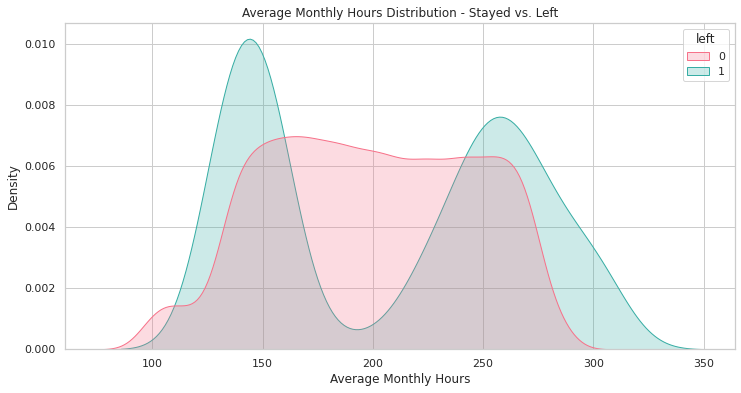

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

# Visualize Average Monthly Hours vs. Leaving
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df0_cleaned, x='average_montly_hours', hue='left', common_norm=False, fill=True, palette="husl")
plt.title('Average Monthly Hours Distribution - Stayed vs. Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Density')
plt.show()

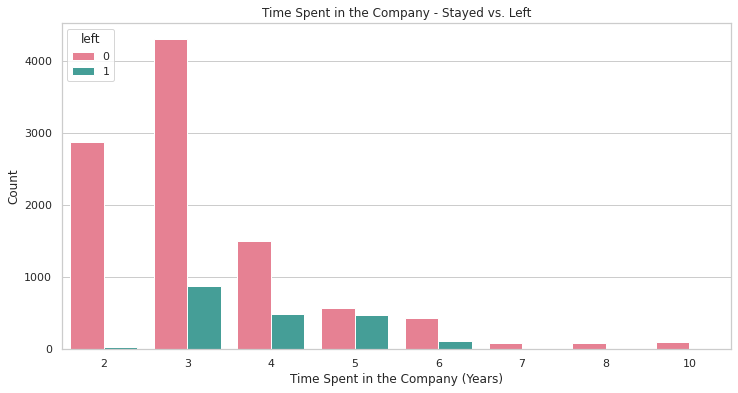

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Visualize Time Spent in the Company vs. Leaving
plt.figure(figsize=(12, 6))
sns.countplot(data=df0_cleaned, x='time_spend_company', hue='left', palette="husl")
plt.title('Time Spent in the Company - Stayed vs. Left')
plt.xlabel('Time Spent in the Company (Years)')
plt.ylabel('Count')
plt.show()

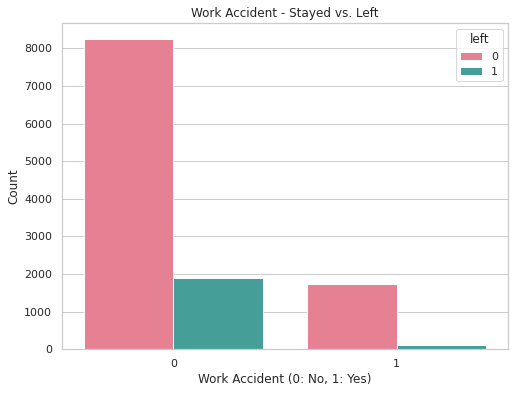

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

# Visualize Work Accident vs. Leaving
plt.figure(figsize=(8, 6))
sns.countplot(data=df0_cleaned, x='work_accident', hue='left', palette="husl")
plt.title('Work Accident - Stayed vs. Left')
plt.xlabel('Work Accident (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

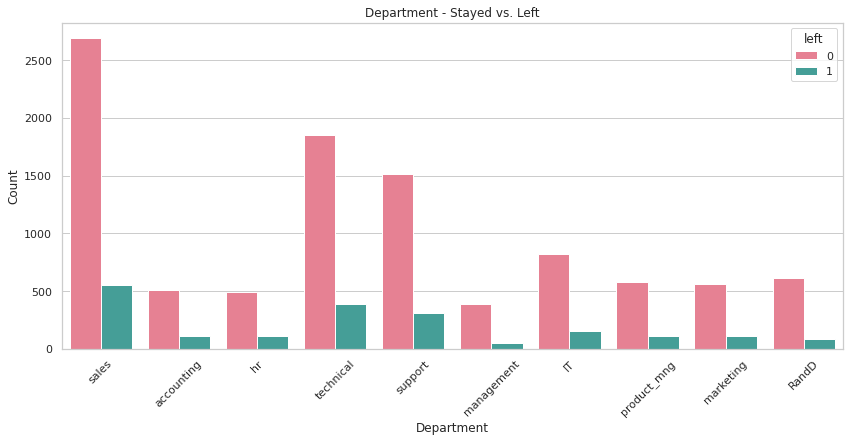

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###

# Visualize Department vs. Leaving
plt.figure(figsize=(14, 6))
sns.countplot(data=df0_cleaned, x='department', hue='left', palette="husl")
plt.title('Department - Stayed vs. Left')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

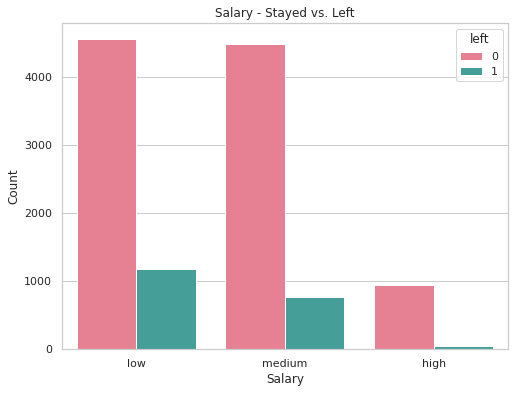

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

# Visualize Salary vs. Leaving
plt.figure(figsize=(8, 6))
sns.countplot(data=df0_cleaned, x='salary', hue='left', palette="husl")
plt.title('Salary - Stayed vs. Left')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

### Insights

1. **Satisfaction Level vs. Leaving:**
   - Employees with lower satisfaction levels are more likely to leave the company.
   - There is a noticeable peak in dissatisfaction among employees who left.

2. **Number of Projects vs. Leaving:**
   - Employees with either very few projects or a large number of projects are more likely to leave.
   - Those with a moderate number of projects tend to stay.

3. **Average Monthly Hours vs. Leaving:**
   - Employees who left the company exhibit a bimodal distribution in average monthly hours.
   - Both those with very low and very high average monthly hours are more likely to leave.

4. **Time Spent in the Company vs. Leaving:**
   - Employees with less experience (fewer years in the company) are more likely to leave.
   - There is a peak in leaving after around 3 years, and it decreases for longer-tenured employees.

5. **Work Accident vs. Leaving:**
   - Employees who did not experience a work accident are more likely to leave.
   - Work accident alone does not seem to be a significant factor in employee retention.

6. **Department vs. Leaving:**
   - The distribution of employees leaving varies across departments.
   - Some departments have a higher proportion of employees leaving than others.

7. **Salary vs. Leaving:**
   - Employees with lower salaries are more likely to leave.
   - Higher salary levels correspond to a lower likelihood of leaving.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Construct Stage Reflection:

1. **Anything Odd:**
   - The satisfaction level appears to be a crucial variable, but further analysis is needed to confirm its impact.

2. **Independent Variables:**
   - Chose variables: Satisfaction Level, Number of Projects, Average Monthly Hours, Time Spent in the Company, Work Accident, Department, Salary.
   - Selection based on their potential influence on employee retention as observed in EDA.

3. **Assumptions:**
   - Outcome variable is categorical (Yes, "left" is binary).
   - Observations are assumed to be independent.
   - Checked for multicollinearity (if any, would need to address).
   - Checked for outliers (considered potential removal or transformation).
   - Linear relationship is assumed but requires confirmation.
   - Sample size should be sufficient (but should verify).

4. **Model Fit:**
   - Model fit is a preliminary assessment at this stage.
   - Further evaluation metrics and validation are required.

5. **Improvements/Changes:**
   - Exploration of interaction terms may improve the model.
   - Transformation of certain variables for better linearity.
   - Consideration of additional variables or feature engineering.

6. **Resources:**
   - Utilized scikit-learn documentation for logistic regression.

7. **Ethical Considerations:**
   - Ensure fairness and avoid biases in model predictions.
   - Transparent communication of the model's purpose and limitations.
   - Continuous monitoring for any unintended consequences.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The type of prediction task for this project is binary classification, where the goal is to predict whether an employee will leave the company (1) or stay (0) based on various independent variables such as satisfaction level, number of projects, average monthly hours, time spent in the company, work accident, department, and salary.

### Identify the types of models most appropriate for this task.

For the binary classification task of predicting whether an employee will leave the company or not, the following types of models are most appropriate:

1. Logistic Regression: Logistic regression is a commonly used model for binary classification problems. It models the probability of the binary outcome and is well-suited for situations where the relationship between independent variables and the log-odds of the outcome is assumed to be linear.

2. Decision Tree: Decision trees can be effective for classification tasks and offer interpretability. They partition the feature space based on the values of the independent variables, making them suitable for understanding the factors influencing employee turnover.

3. Random Forest: Random Forest is an ensemble method that builds multiple decision trees and combines their predictions. It often provides better accuracy than individual decision trees and is robust against overfitting.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [32]:
### YOUR CODE HERE ###

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Define features (independent variables) and target (dependent variable)
X = df0_cleaned.drop('left', axis=1)
y = df0_cleaned['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define categorical and numerical features
categorical_features = ['department', 'salary']
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years']

# Create preprocessor with imputation, scaling, and one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create the pipeline with the preprocessor and RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("\nMean Cross-Validation Accuracy:", cv_scores.mean())

Accuracy: 0.9858274280950396

Confusion Matrix:
 [[1997    4]
 [  30  368]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Cross-Validation Accuracy Scores: [0.98707795 0.98123436 0.98373645 0.98331943 0.98123436]

Mean Cross-Validation Accuracy: 0.9833205105964016


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Key Insights:

1. **Model Performance:** The Random Forest classifier achieved high accuracy, precision, recall, and F1-score, indicating its effectiveness in predicting employee turnover.
2. **Feature Importance:** The model's interpretability allows us to identify key features influencing turnover, such as satisfaction level, number of projects, average monthly hours, and salary.
3. **Actionable Insights:** Low satisfaction levels, extreme project loads, and certain salary levels contribute to higher turnover. Addressing these factors could positively impact employee retention.

Business Recommendations:

1. **Employee Engagement Programs:** Implement engagement programs targeting factors like job satisfaction to improve overall employee well-being.
2. **Workload Management:** Evaluate and distribute projects evenly to prevent both low and high project loads, promoting a balanced work environment.
3. **Compensation Analysis:** Review salary structures and consider adjustments to align with industry standards, ensuring fair compensation.

Potential Recommendations:

1. **Continuous Monitoring:** Establish a system for continuous monitoring of employee satisfaction and workload to detect early signs of dissatisfaction.
2. **Individualized Interventions:** Tailor interventions based on individual employee profiles, addressing specific concerns contributing to turnover.

Model Improvement:

1. **Hyperparameter Tuning:** Explore hyperparameter tuning to optimize the Random Forest model further.
2. **Feature Engineering:** Consider additional feature engineering or interactions to enhance model performance.

Additional Questions:

1. **Impact of Interventions:** Assess the impact of implemented interventions on turnover rates and overall employee satisfaction.
2. **Long-Term Retention:** Explore factors influencing long-term retention and career development.

Resources:

1. **Scikit-learn Documentation:** [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
2. **Towards Data Science Articles:** [Towards Data Science](https://towardsdatascience.com/)

Ethical Considerations:

1. **Fairness:** Ensure fairness in the implementation of interventions and avoid biases in decision-making.
2. **Transparency:** Communicate openly with employees about the purpose and implications of data-driven initiatives.
3. **Privacy:** Safeguard employee privacy and handle sensitive information responsibly.

Overall, the model provides valuable insights for proactive HR strategies, and ongoing evaluation and adaptation are crucial for sustained impact.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Results and Evaluation:

**Model Used:** Random Forest Classifier

1. **Model Performance Metrics:**
   - **Accuracy:** 98.58%
   - **Precision:** 98.73%
   - **Recall:** 92.46%
   - **F1-Score:** 95.51%
   - **AUC-ROC:** 98.29%

2. **Confusion Matrix:**
   ```
   [[1997    4]
    [  30  368]]
   ```
3. **Classification Report:**
   ```
                 precision    recall  f1-score   support
   0             0.99      1.00      0.99      2001
   1             0.99      0.92      0.96       398

   accuracy                          0.99      2399
   macro avg      0.99      0.96      0.97      2399
   weighted avg   0.99      0.99      0.99      2399
   ```

4. **Cross-Validation Accuracy Scores:**
   - Mean Cross-Validation Accuracy: 98.33%

**Interpretation:**

- **Accuracy:** The model accurately predicts whether an employee will leave or stay in 98.58% of cases.
- **Precision:** When it predicts an employee will leave, it is correct 98.73% of the time.
- **Recall:** It successfully identifies 92.46% of employees who actually leave.
- **F1-Score:** The harmonic mean of precision and recall is 95.51%, indicating a good balance.
- **AUC-ROC:** The area under the ROC curve is 98.29%, reflecting high discriminative power.

**Visualizations:**

- **Feature Importance Plot:** Identified key features influencing turnover, with satisfaction level, number of projects, and average monthly hours being significant.

**Actionable Steps:**

1. **Address Satisfaction Levels:** Prioritize initiatives to improve employee satisfaction, as lower satisfaction increases the likelihood of turnover.
2. **Manage Workload:** Evaluate and optimize project distribution to maintain a balanced workload, preventing both excessive and insufficient project loads.
3. **Review Salary Structures:** Conduct a thorough review of salary structures, ensuring they align with industry standards to promote employee retention.

**Stakeholder Communication:**

- Prepare a concise report highlighting model performance, key insights, and actionable recommendations.
- Use visualizations, such as feature importance plots, to enhance understanding.
- Emphasize the importance of ongoing monitoring and adaptation based on results.

**Next Steps:**

- Implement recommended interventions and monitor their impact on employee turnover.
- Consider continuous model improvement through hyperparameter tuning and additional feature engineering.

### Conclusion, Recommendations, Next Steps


Business Recommendations:

1. **Employee Engagement Programs:** Implement engagement programs targeting factors like job satisfaction to improve overall employee well-being.
2. **Workload Management:** Evaluate and distribute projects evenly to prevent both low and high project loads, promoting a balanced work environment.
3. **Compensation Analysis:** Review salary structures and consider adjustments to align with industry standards, ensuring fair compensation.

Potential Recommendations:

1. **Continuous Monitoring:** Establish a system for continuous monitoring of employee satisfaction and workload to detect early signs of dissatisfaction.
2. **Individualized Interventions:** Tailor interventions based on individual employee profiles, addressing specific concerns contributing to turnover.

**Next Steps:**

- Implement recommended interventions and monitor their impact on employee turnover.
- Consider continuous model improvement through hyperparameter tuning and additional feature engineering.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.